In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load raw data (from uploaded file)
df = pd.read_csv("/content/monthly_kpis.csv")

# Convert month to datetime
df["Month"] = pd.to_datetime(df["Month"])

# Sort by date
df = df.sort_values("Month")

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
df = df.fillna(method="ffill")

# Quick check
print("Rows:", len(df))
display(df.head())
display(df.describe)

# Save clean dataset
df.to_csv("/content/monthly_kpis_clean.csv", index=False)

print("Clean dataset saved.")

Rows: 13


/tmp/ipython-input-173704017.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


,Month,Revenue,orders,Customers,AOV
0,2010-12-01,748957.020,2025,948,369.855319
1,2011-01-01,560000.260,1476,783,379.403970
2,2011-02-01,498062.650,1393,798,357.546770
3,2011-03-01,683267.080,1983,1020,344.562320
4,2011-04-01,493207.121,1744,899,282.802248


<bound method NDFrame.describe of         Month      Revenue  orders  Customers         AOV
0  2010-12-01   748957.020    2025        948  369.855319
1  2011-01-01   560000.260    1476        783  379.403970
2  2011-02-01   498062.650    1393        798  357.546770
3  2011-03-01   683267.080    1983       1020  344.562320
4  2011-04-01   493207.121    1744        899  282.802248
5  2011-05-01   723333.510    2162       1079  334.566841
6  2011-06-01   691123.120    2012       1051  343.500557
7  2011-07-01   681300.111    1927        993  353.554806
8  2011-08-01   682680.510    1737        980  393.022746
9  2011-09-01  1019687.622    2327       1302  438.198376
10 2011-10-01  1070704.670    2637       1425  406.031350
11 2011-11-01  1461756.250    3462       1711  422.228842
12 2011-12-01   433668.010    1015        686  427.259123>

Clean dataset saved.


In [4]:
# Load cleaned dataset
df = pd.read_csv("/content/monthly_kpis_clean.csv")

# Ensure datetime
df["Month"] = pd.to_datetime(df["Month"])

# Sort
df = df.sort_values("Month").reset_index(drop=True)

# --- MoM Revenue Growth %
df["Revenue_MoM_%"] = df["Revenue"].pct_change() * 100

# --- Orders MoM
# Διόρθωση: Το όνομα της στήλης είναι 'orders' και όχι 'Orders'
df["Orders_MoM_%"] = df["orders"].pct_change() * 100

# Rolling Average (3 months)
df["Revenue_3M_Rolling"] = df["Revenue"].rolling(3).mean()

# Growth flag (Up / Down)
df["Revenue_Trend"] = df["Revenue_MoM_%"].apply(
    lambda x: "Up" if x > 0 else ("Down" if x < 0 else "Flat")
)

# --- Growth Category (Strong/ Mild/ Decline)
def growth_category(x):
  if pd.isna(x):
    return "N/A"
  elif x > 10:
    return "Strong Growth"
  elif x>0:
    return "Mild Growth"
  elif x>-10:
    return "Mild Decline"
  else:
    return "Strong Decline"

df["Revenue_Growth_Category"] = df["Revenue_MoM_%"].apply(growth_category)

# Preview
display(df.head(10))

# Save enriched dataset
df.to_csv("/content/monthly_kpis_enriched.csv", index=False)

print("Enriched dataset saved.")

,Month,Revenue,orders,Customers,AOV,Revenue_MoM_%,Orders_MoM_%,Revenue_3M_Rolling,Revenue_Trend,Revenue_Growth_Category
0,2010-12-01,748957.020,2025,948,369.855319,NaN,NaN,NaN,Flat,N/A
1,2011-01-01,560000.260,1476,783,379.403970,-25.229320,-27.111111,NaN,Down,Strong Decline
2,2011-02-01,498062.650,1393,798,357.546770,-11.060282,-5.623306,602339.976667,Down,Strong Decline
3,2011-03-01,683267.080,1983,1020,344.562320,37.184967,42.354630,580443.330000,Up,Strong Growth
4,2011-04-01,493207.121,1744,899,282.802248,-27.816350,-12.052446,558178.950333,Down,Strong Decline
5,2011-05-01,723333.510,2162,1079,334.566841,46.659178,23.967890,633269.237000,Up,Strong Growth
6,2011-06-01,691123.120,2012,1051,343.500557,-4.453048,-6.938020,635887.917000,Down,Mild Decline
7,2011-07-01,681300.111,1927,993,353.554806,-1.421311,-4.224652,698585.580333,Down,Mild Decline
8,2011-08-01,682680.510,1737,980,393.022746,0.202612,-9.859886,685034.580333,Up,Mild Growth
9,2011-09-01,1019687.622,2327,1302,438.198376,49.365275,33.966609,794556.081000,Up,Strong Growth


Enriched dataset saved.


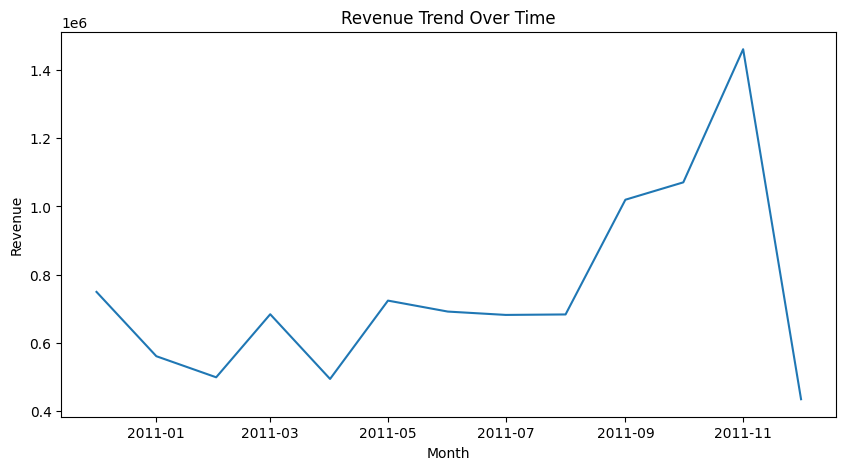

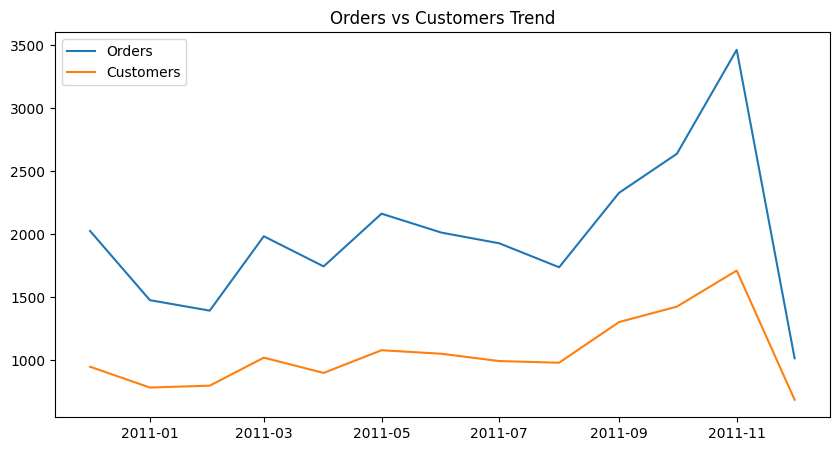

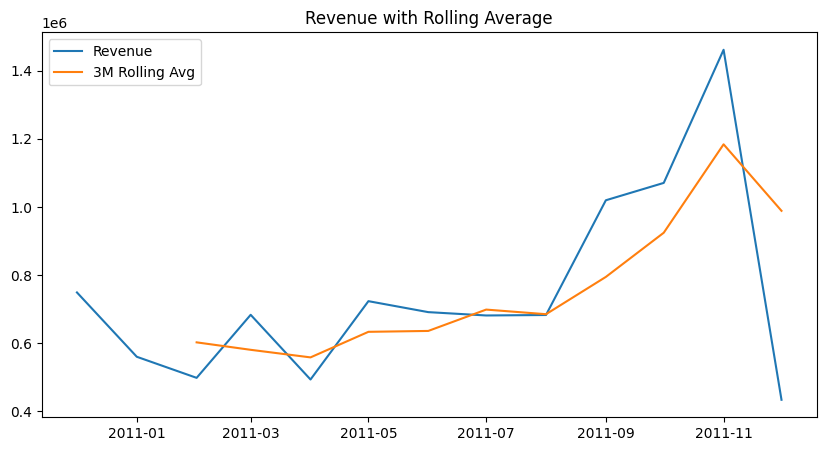

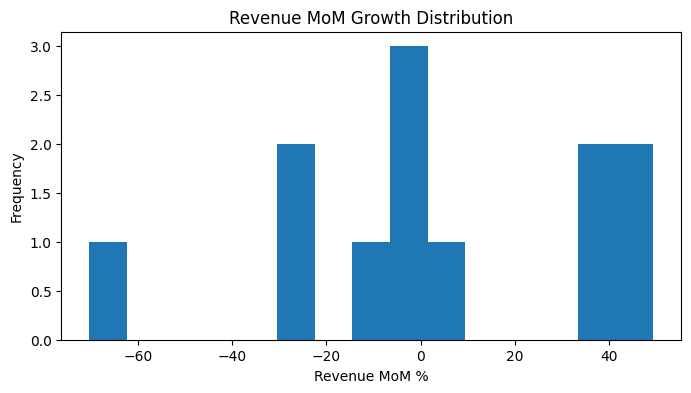

Correlation Matrix:
            Revenue    orders  Customers
Revenue    1.000000  0.958122   0.977313
orders     0.958122  1.000000   0.975748
Customers  0.977313  0.975748   1.000000

Top Growth Months:


,Month,Revenue_MoM_%
9,2011-09-01,49.365275
5,2011-05-01,46.659178
3,2011-03-01,37.184967



Top Decline Months:


,Month,Revenue_MoM_%
12,2011-12-01,-70.332399
4,2011-04-01,-27.816350
1,2011-01-01,-25.229320


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load enriched dataset
df = pd.read_csv("/content/monthly_kpis_enriched.csv")

# Ensure datetime
df["Month"] = pd.to_datetime(df["Month"])

# --------------------
# 1. Trend Analysis
# --------------------
plt.figure(figsize=(10, 5))
# Διόρθωση: Πέρασμα X και Y ως ξεχωριστά ορίσματα
plt.plot(df["Month"], df["Revenue"])
plt.title("Revenue Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

# ---------------------
# 2. Order vs Customers
# ---------------------
plt.figure(figsize=(10, 5))
# Διόρθωση: Το όνομα της στήλης είναι 'orders' (πεζά)
plt.plot(df["Month"], df["orders"], label="Orders")
plt.plot(df["Month"], df["Customers"], label="Customers")
plt.title("Orders vs Customers Trend")
plt.legend()
plt.show()

# ---------------------
# 3. Rolling Average (Smoothed Trend)
# ---------------------
plt.figure(figsize=(10, 5))
plt.plot(df["Month"], df["Revenue"], label="Revenue")
plt.plot(df["Month"], df["Revenue_3M_Rolling"], label="3M Rolling Avg")
plt.title("Revenue with Rolling Average")
plt.legend()
plt.show()

# ----------------------
# 4. Growth Distribution
# ----------------------
plt.figure(figsize=(8, 4))
plt.hist(df["Revenue_MoM_%"].dropna(), bins=15)
plt.title("Revenue MoM Growth Distribution")
plt.xlabel("Revenue MoM %")
plt.ylabel("Frequency")
plt.show()

# ----------------------
# 5. Correlation
# ----------------------
# Διόρθωση: 'orders' αντί για 'Orders'
corr = df[["Revenue", "orders", "Customers"]].corr()
print("Correlation Matrix:")
print(corr)

# ----------------------
# 6. Top Growth / Decline Months
# ----------------------
top_growth = df.sort_values("Revenue_MoM_%", ascending=False).head(3)
top_decline = df.sort_values("Revenue_MoM_%").head(3)

print("\nTop Growth Months:")
display(top_growth[["Month", "Revenue_MoM_%"]])

print("\nTop Decline Months:")
# Διόρθωση: Αφαίρεση της άνω τελείας από το "Month:"
display(top_decline[["Month", "Revenue_MoM_%"]])

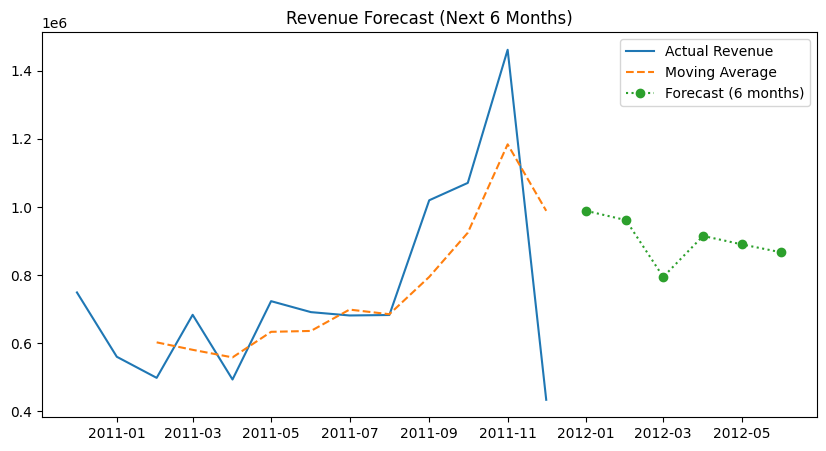

Forecast CSV exported -> revenue_forecast.csv


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load enriched data
df = pd.read_csv("monthly_kpis_enriched.csv", parse_dates=["Month"])
df = df.sort_values("Month")

# Use only Month and Revenue
ts = df.set_index("Month")["Revenue"]

# Simple Moving Average Forecast
window = 3
forecast_periods = 6

rolling_mean = ts.rolling(window=window).mean()

last_values = ts[-window:]
forecast = []

for i in range(forecast_periods):
  next_val = last_values.mean()
  forecast.append(next_val)
  last_values = pd.concat([last_values[1:], pd.Series([next_val])])

# Create forecast dates
forecast_index = pd.date_range(ts.index[-1] + pd.DateOffset(months=1), periods=forecast_periods, freq ="MS")
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(ts, label="Actual Revenue")
plt.plot(rolling_mean, linestyle="--", label="Moving Average")
plt.plot(forecast_series, linestyle=":", marker="o", label="Forecast (6 months)")
plt.legend()
plt.title("Revenue Forecast (Next 6 Months)")
plt.show()

# Save for Tableau
forecast_df = forecast_series.reset_index()
forecast_df.columns = ["Month", "Forecast_Revenue"]
forecast_df.to_csv("revenue_forecast.csv", index=False)

print("Forecast CSV exported -> revenue_forecast.csv")
